In [1]:
import cv2
import numpy as np

After generating the segmentation images, place them in the training/testing folder. Make separate folders for input images and the segmentation images. The file name of the input image and the corresponding segmentation image should be the same. For this tutorial we would be using a data-set which is already prepared. You can download it from here ([Aerial Semantic Segmentation Drone Dataset](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset)).

## [Aerial Semantic Segmentation Drone Dataset](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset)

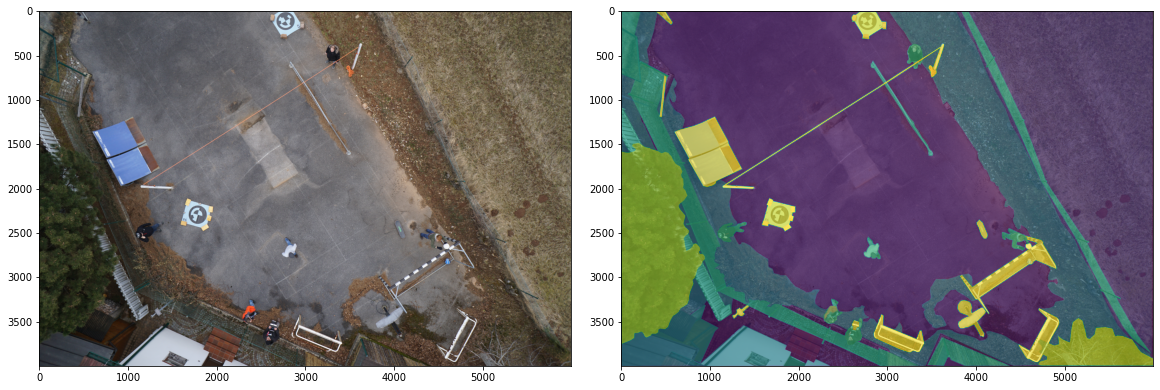

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "data/dataset/semantic_drone_dataset/original_images/001.jpg"
label_image_semantic = "data/dataset/semantic_drone_dataset/label_images_semantic/001.png"

fig, axs = plt.subplots(1,2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
# axs.grid(False)

label_image_semantic = Image.open(label_image_semantic)
axs[1].imshow( Image.open(original_image))
# label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic,alpha = 0.6)
# axs[1].grid(False)

model_name	Base Model	Segmentation Model
fcn_8	Vanilla CNN	FCN8
fcn_32	Vanilla CNN	FCN8
fcn_8_vgg	VGG 16	FCN8
fcn_32_vgg	VGG 16	FCN32
fcn_8_resnet50	Resnet-50	FCN32
fcn_32_resnet50	Resnet-50	FCN32
fcn_8_mobilenet	MobileNet	FCN32
fcn_32_mobilenet	MobileNet	FCN32
pspnet	Vanilla CNN	PSPNet
vgg_pspnet	VGG 16	PSPNet
resnet50_pspnet	Resnet-50	PSPNet
unet_mini	Vanilla Mini CNN	U-Net
unet	Vanilla CNN	U-Net
vgg_unet	VGG 16	U-Net
resnet50_unet	Resnet-50	U-Net
mobilenet_unet	MobileNet	U-Net
segnet	Vanilla CNN	Segnet
vgg_segnet	VGG 16	Segnet
resnet50_segnet	Resnet-50	Segnet
mobilenet_segnet	MobileNet	Segnet

In [3]:
!pip install keras-segmentation

You should consider upgrading via the '/home/scutum/envs/data-science/bin/python -m pip install --upgrade pip' command.


In [5]:
from keras_segmentation.models.unet import resnet50_unet

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = resnet50_unet(n_classes=n_classes ,  input_height=416, input_width=608  )
epochs = 10
model.train( 
    train_images =  "data/dataset/semantic_drone_dataset/original_images/",
    train_annotations = "data/dataset/semantic_drone_dataset/label_images_semantic/",
    checkpoints_path = "resnet50_unet" , epochs=epochs)

  0%|          | 0/400 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 400/400 [02:44<00:00,  2.44it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
512/512 [==============================] - 423s 826ms/step - loss: 3.6215 - accuracy: 0.0356
Epoch 2/10
512/512 [==============================] - 429s 837ms/step - loss: 3.2719 - accuracy: 0.1417
Epoch 3/10
512/512 [==============================] - 429s 837ms/step - loss: 3.0546 - accuracy: 0.2500
Epoch 4/10
512/512 [==============================] - 427s 834ms/step - loss: 2.9096 - accuracy: 0.3007
Epoch 5/10
512/512 [==============================] - 425s 831ms/step - loss: 2.8023 - accuracy: 0.3314
Epoch 6/10
512/512 [==============================] - 427s 835ms/step - loss: 2.7104 - accuracy: 0.3540
Epoch 7/10
512/512 [==============================] - 425s 830ms/step - loss: 2.6343 - accuracy: 0.3725
Epoch 8/10
512/512 [==============================] - 427s 833ms/step - loss: 2.5709 - accuracy: 0.3869
Epoch 9/10
512/512 [==============================] - 425s 830ms/step - loss: 2.5164 - accuracy: 0.3985
Epoch 10/10
512/512 [==============================] - 428s 837m

### Train

### Prediction

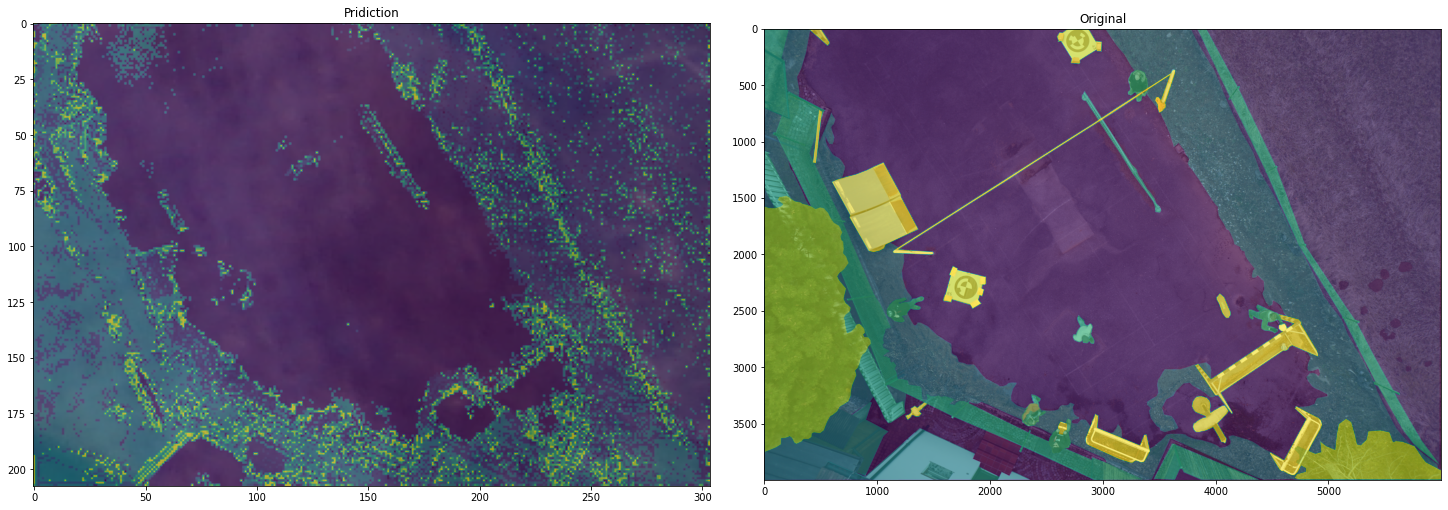

In [7]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "data/dataset/semantic_drone_dataset/original_images/001.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 2, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('Pridiction')
axs[0].grid(False)
axs[0].imshow(out,alpha = 0.6)


validation_image = "data/dataset/semantic_drone_dataset/label_images_semantic/001.png"

axs[1].imshow(img_orig)
axs[1].imshow( Image.open(validation_image),alpha = 0.6)
axs[1].set_title('Original')
axs[1].grid(False)

done = time.time()
elapsed = done - start

In [8]:
print(elapsed)
print(out)
print(out.shape)

2.665756940841675
[[22 22  1 ...  3 19  2]
 [ 1  1  1 ...  3 21  2]
 [ 1  1  5 ...  3  8 17]
 ...
 [22  9  5 ...  8 17 22]
 [22  9  5 ...  6  6  8]
 [16  9  5 ...  3  2  5]]
(208, 304)
